## Data Augmentation

- 30 classes
- Augmentation: Randomized skew + shear 
- Creates 50 additional images per class

In [1]:
# example of horizontal shift image augmentation
from numpy import expand_dims
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import scipy
import pathlib
import PIL
import matplotlib.pyplot as plt
import Augmentor
import shutil


2023-01-06 03:08:22.359049: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
HOME_DIR = "/Users/ruhiyusuf/projects/frc-vision"
WORKING_DIR = os.path.join(HOME_DIR, "modeltraining")
DATA_DIR = os.path.join(WORKING_DIR, "data") # change path accordingly
NUM_CLASSES = 30

CREATE_DATA = False

In [3]:
if CREATE_DATA: 
    # convert png to jpeg
    from PIL import Image
    for i in range(0, NUM_CLASSES):
        im1 = Image.open(os.path.join(DATA_DIR, str(i) + '.png'))
        im1 = im1.convert('RGB')
        im1.save(os.path.join(DATA_DIR, str(i) + '.jpeg'))

In [4]:
if CREATE_DATA:
    # add img to new folders
    for i in range(0, NUM_CLASSES):
        if (not(os.path.exists(os.path.join(DATA_DIR, str(i))))):
            os.mkdir(os.path.join(DATA_DIR, str(i)))
            os.rename(os.path.join(DATA_DIR, str(i) + '.jpeg'), os.path.join(DATA_DIR, str(i), str(i) + '.jpeg'))
    

Total # of images: 3097


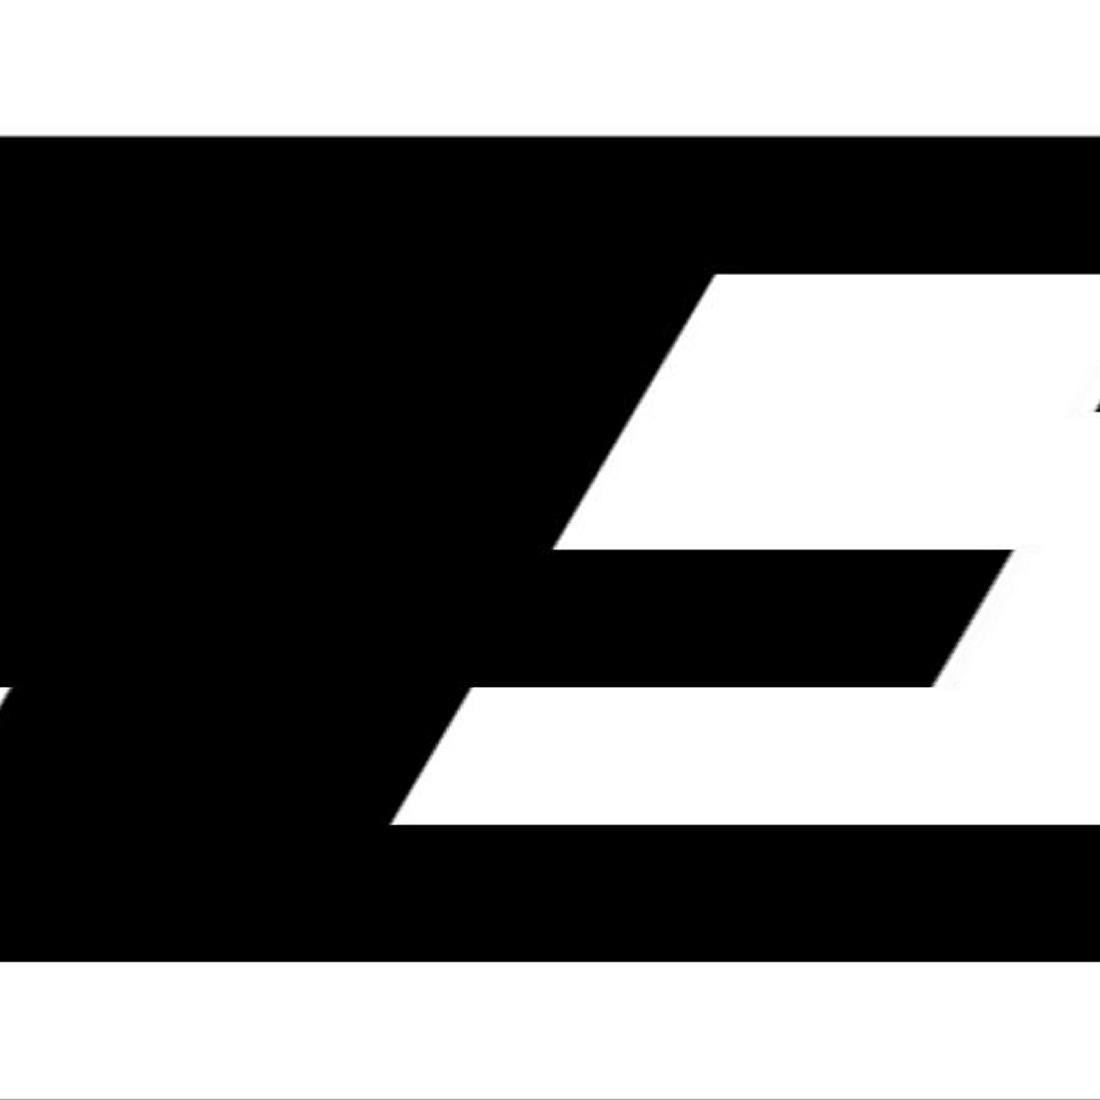

In [5]:
image_count = len(list(pathlib.Path(DATA_DIR).glob('*/*.jpeg')))
print("Total # of images:", image_count)

id0 = list(pathlib.Path(DATA_DIR).glob('0/*'))
PIL.Image.open(str(id0[0]))

In [6]:
"""
# adding to model architecture
trainAug = Sequential([
	preprocessing.Rescaling(scale=1.0 / 255),
	preprocessing.RandomFlip("horizontal_and_vertical"),
	preprocessing.RandomZoom(
		height_factor=(-0.05, -0.15),
		width_factor=(-0.05, -0.15)),
	preprocessing.RandomRotation(0.3)
])
"""



'\n# adding to model architecture\ntrainAug = Sequential([\n\tpreprocessing.Rescaling(scale=1.0 / 255),\n\tpreprocessing.RandomFlip("horizontal_and_vertical"),\n\tpreprocessing.RandomZoom(\n\t\theight_factor=(-0.05, -0.15),\n\t\twidth_factor=(-0.05, -0.15)),\n\tpreprocessing.RandomRotation(0.3)\n])\n'

In [7]:
"""
def augment(images, labels):
	images = tf.image.random_flip_left_right(images)
	images = tf.image.random_flip_up_down(images)
	images = tf.image.rot90(images)

	return (images, labels)

"""

'\ndef augment(images, labels):\n\timages = tf.image.random_flip_left_right(images)\n\timages = tf.image.random_flip_up_down(images)\n\timages = tf.image.rot90(images)\n\n\treturn (images, labels)\n\n'

2023-01-06 03:08:41.055345: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
(1100, 1100, 3)


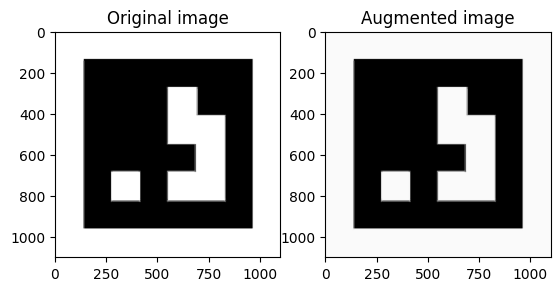

In [8]:

# create data generator
img = load_img(os.path.join(DATA_DIR, '0', '0.jpeg'))

# convert to numpy array
img = img_to_array(img)

def augment_sample(image):
	# image = tf.image.random_flip_left_right(image)
	# image = tf.image.random_flip_up_down(image)
	# image = tf.image.rot90(image)
    image = tf.image.random_jpeg_quality(image, 0, 10)
    return image

def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)


visualize(img, augment_sample(img))
print(img.shape)



In [9]:

if CREATE_DATA:
    for i in range(0, NUM_CLASSES):
        class_dir = os.path.join(DATA_DIR, str(i))
        p = Augmentor.Pipeline(class_dir)

        p.shear(probability=0.40, max_shear_left=20, max_shear_right=20)
        # p.skew_left_right(probability=1.0)
        # p.skew(probability=0.5)
        p.skew(probability=0.9)
        p.sample(50)

        # PIL.Image.open(os.path.join(DATA_DIR, "0", "0.jpeg"))
        for files in os.listdir(os.path.join(class_dir, "output")):
            if files.endswith('.jpeg'):
                shutil.move(os.path.join(class_dir, "output", files), os.path.join(class_dir, files))



In [10]:
if CREATE_DATA:
    for i in range(0, NUM_CLASSES):
        class_dir = os.path.join(DATA_DIR, str(i))

        shutil.rmtree(os.path.join(class_dir, "output"))

## Creating Datasets
- Training
- Validation
- Test

In [11]:
batch_size = 32
img_height = 500
img_width = 500

In [12]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  DATA_DIR,
  validation_split=0.2,
  subset="training",
  seed = 123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3097 files belonging to 30 classes.
Using 2478 files for training.


In [13]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  DATA_DIR,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3097 files belonging to 30 classes.
Using 619 files for validation.


In [14]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '4', '5', '6', '7', '8', '9']


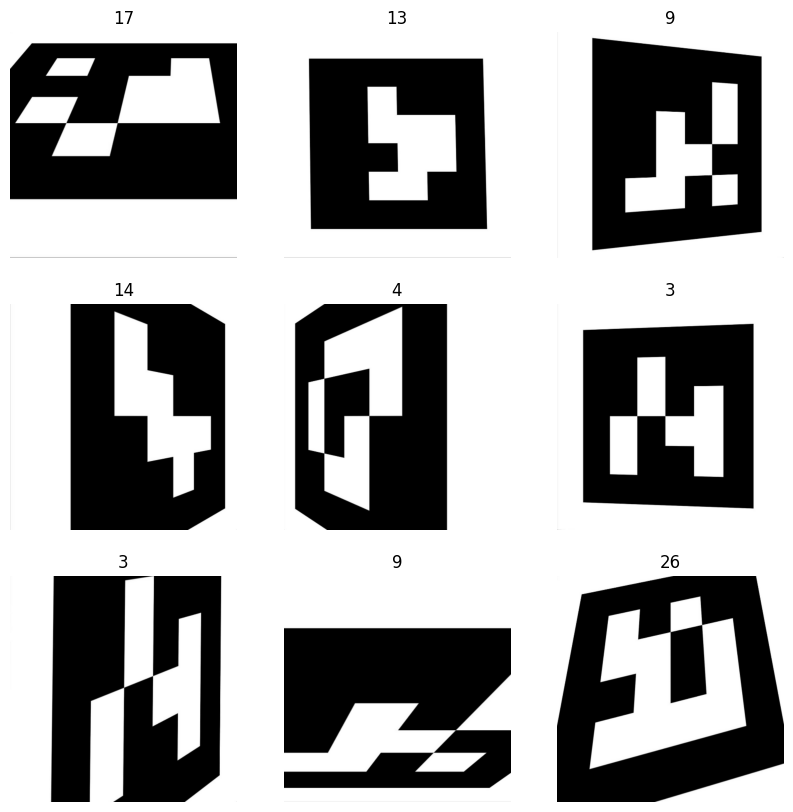

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [15]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 500, 500, 3)
(32,)


In [16]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [17]:
from tensorflow.keras import layers, models
# standardize rgb values (0, 255) to (0, 1)
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [18]:
num_classes = len(class_names)

# sample model
model = models.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 500, 500, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 500, 500, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 250, 250, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 125, 125, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 64)      1

In [17]:
epochs=5 
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
2023-01-06 03:00:57.753990: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 50 of 1000
2023-01-06 03:01:02.119085: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.
78/78 [==============================] - 379s 5s/step - loss: 3.4999 - accuracy: 0.0682 - val_loss: 3.0702 - val_accuracy: 0.1276
Epoch 2/5
11/78 [===>..........................] - ETA: 5:56 - loss: 2.6623 - accuracy: 0.2585